In [1]:
# 데이터 구성 패키지 : Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# grapviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
# matplotlib 이용한 Background 그래프 실행 및 결과 확인
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree/RandomForest/그래디언트 부스팅
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# 모델 성능 평가 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
# mse와 mae 비교 / 주성분분석 / 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
# 최대 열 수 설정df_raw
pd.set_option('display.max_columns', 500)
# 표시할 가로의 길이
pd.set_option('display.width', 1000)
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix
#stats model
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
import statsmodels.api as sm8
#선형 회귀모형
from sklearn.linear_model import LinearRegression
import graphviz
import os
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
from scipy import stats
#한글 폰트(나눔 고딕) 리눅스 환경이라 새로 설치를 했습니다.
matplotlib.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
# 폰트 사이즈
plt.rcParams['font.size'] = 10.
# x축 라벨사이즈
plt.rcParams['xtick.labelsize'] = 10.
# y축 라벨사이즈
from sklearn.metrics import confusion_matrix
from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score
#한글 폰트(나눔 고딕) 리눅스 환경이라 새로 설치를 했습니다.
matplotlib.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
# 폰트 사이즈
plt.rcParams['font.size'] = 10.
# x축 라벨사이즈
plt.rcParams['xtick.labelsize'] = 10.
# y축 라벨사이즈
plt.rcParams['ytick.labelsize'] = 10.
#그래프 축 폰트사이즈
plt.rcParams['axes.labelsize'] = 10.

plt.rcParams['ytick.labelsize'] = 10.
#그래프 축 폰트사이즈
plt.rcParams['axes.labelsize'] = 10.

os.environ["PATH"] += os.pathsep + "./graphviz/bin"

#로지스틱 회귀분석
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

#분류SVM
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix


%matplotlib inline

In [2]:
df_raw = pd.read_csv('review_1.csv',encoding='euckr')

In [3]:
df_raw.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_jud

In [4]:
bl_raw = df_raw[df_raw['review_cat'] == '혈액검사']

In [5]:
bl_raw.isna().sum() # 989개 데이터 활용 증가, 혈액, 일반 분리하여 모델 진행

Unnamed: 0           0
Unnamed: 0.1         0
customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_jud

# 탐색적 분석

In [6]:
def myhist(data,var):
    plt.hist(data[data['risk']==0][var],label = '수익', alpha = 0.5)
    plt.hist(data[data['risk']==1][var],label = '위험', alpha = 0.5)
    plt.legend()
    
def mycrosstab(data,var) : 
    print(pd.crosstab(index = data['risk'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['risk'], columns = data[var],normalize = 'columns').round(3))

In [7]:
def my_t(data,var):
    k = stats.levene(data[data['risk']==0][var],data[data['risk']==1][var])
    t_result = stats.ttest_ind(data[data['risk']==0][[var]],
                               data[data['risk']==1][[var]],equal_var=True) # 2 sample 비교 명령어

    t,p = t_result
    print(k,p)

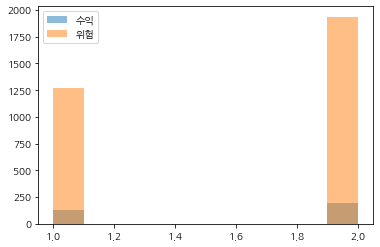

In [8]:
myhist(bl_raw,'gender')

In [9]:
mycrosstab(bl_raw,'gender')

gender     1     2
risk              
0.0      127   199
1.0     1268  1937

gender      1      2
risk                
0.0     0.091  0.093
1.0     0.909  0.907


In [10]:
count = np.array([127,201])
num = np.array([127+1270,201+1937])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}, 따라서 5%에서 유의하지않다'.format(p_value.round(3)))

p-value는 0.756, 따라서 5%에서 유의하지않다


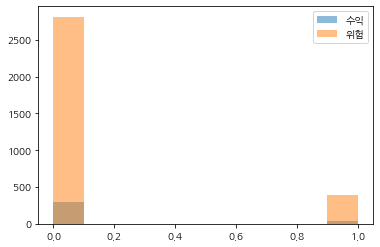

In [11]:
myhist(bl_raw,'bt_hbsa')

In [12]:
mycrosstab(bl_raw,'bt_hbsa')

bt_hbsa   0.0  1.0
risk              
0.0       293   33
1.0      2815  390

bt_hbsa    0.0    1.0
risk                 
0.0      0.094  0.078
1.0      0.906  0.922


In [13]:
count = np.array([294,34])
num = np.array([2816+294,391+34])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}, 따라서 5%에서 유의하지않다'.format(p_value.round(3)))

p-value는 0.333, 따라서 5%에서 유의하지않다


In [14]:
bl_set = bl_raw[['age', 'height', 'weight', 'bust', 'waist', 'bmi', 'whtr', 'rfm',
       'bp_min', 'bp_max', 'pulse_count', 'bt_chol', 'bt_gluc',
       'bt_sgpt', 'judge_score',
       'bp_judge', 'pulse_count_judge', 'bt_chol_judge', 'bt_crea_judge',
       'bt_gluc_judge', 'bt_hb_judge', 'bt_hbsa_judge', 'bt_hct_judge',
       'bt_mch_judge', 'bt_mchc_judge', 'bt_mvc_judge', 'bt_plat_judge',
       'bt_rbc_judge', 'bt_wbc_judge', 'bt_rgpt_judge', 'bt_sgot_judge',
       'bt_sgpt_judge', 'bt_trig_judge', 'risk']]

In [15]:
st = ''
for i in bl_set.columns :
    st += i
    st += "+"
print(st)

age+height+weight+bust+waist+bmi+whtr+rfm+bp_min+bp_max+pulse_count+bt_chol+bt_gluc+bt_sgpt+judge_score+bp_judge+pulse_count_judge+bt_chol_judge+bt_crea_judge+bt_gluc_judge+bt_hb_judge+bt_hbsa_judge+bt_hct_judge+bt_mch_judge+bt_mchc_judge+bt_mvc_judge+bt_plat_judge+bt_rbc_judge+bt_wbc_judge+bt_rgpt_judge+bt_sgot_judge+bt_sgpt_judge+bt_trig_judge+risk+


In [16]:
log_model = Logit.from_formula(''' risk ~ age+height+rfm+weight+bust+waist+bmi+whtr+bp_min+bp_max+pulse_count+bt_chol+bt_gluc+bt_sgpt+judge_score+bp_judge+pulse_count_judge+bt_chol_judge+bt_crea_judge+bt_gluc_judge+bt_hb_judge+bt_hbsa_judge+bt_hct_judge+bt_mch_judge+bt_mchc_judge+bt_mvc_judge+bt_plat_judge+bt_rbc_judge+bt_wbc_judge+bt_rgpt_judge+bt_sgot_judge+bt_sgpt_judge+bt_trig_judge ''',data = bl_set)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.302142
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                 3531
Model:                          Logit   Df Residuals:                     3498
Method:                           MLE   Df Model:                           32
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.01865
Time:                        10:59:48   Log-Likelihood:                -1066.9
converged:                      False   LL-Null:                       -1087.1
Covariance Type:            nonrobust   LLR p-value:                    0.1428
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.4113     13.970      1.389      0.165      -7.970      46.792
age                  -0.0050      0.007     

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
df_x = bl_set.drop(['risk','judge_score','waist','weight'],axis = 1)
df_x # 종속 변수 빼고 새롭게 데이터 프레임 생성
df_x_const = add_constant(df_x) # const열 생성

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3) # 다중공선성 존재 X -> 회귀식 자체로 판단

,variable,VIF
14,pulse_count_judge,1.007
9,pulse_count,1.022
26,bt_wbc_judge,1.033
16,bt_crea_judge,1.050
24,bt_plat_judge,1.082
19,bt_hbsa_judge,1.092
30,bt_trig_judge,1.145
25,bt_rbc_judge,1.177
27,bt_rgpt_judge,1.206
15,bt_chol_judge,1.384


# 5% 유의수준 설정

In [18]:
log_model = Logit.from_formula('''
        risk ~ bp_max+
        bt_hb_judge+
        bust+
        whtr
         ''',data = bl_set)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.307685
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                 3531
Model:                          Logit   Df Residuals:                     3526
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:               0.0006487
Time:                        10:59:48   Log-Likelihood:                -1086.4
converged:                       True   LL-Null:                       -1087.1
Covariance Type:            nonrobust   LLR p-value:                    0.8424
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.6322      0.937      2.810      0.005       0.796       4.468
bp_max          0.0040    

In [19]:
df_y = bl_set['risk']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 10).fit(df_x,df_y)
# df_x는 다중 공선성으로 제거 후 남은 x인자만 존재
selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print("select variables : ",selected_cols)
print("removed variable : ",removed_cols)

select variables :  Index(['pulse_count_judge', 'bt_crea_judge', 'bt_gluc_judge', 'bt_hb_judge', 'bt_hct_judge', 'bt_mchc_judge', 'bt_plat_judge', 'bt_rbc_judge', 'bt_wbc_judge', 'bt_rgpt_judge'], dtype='object')
removed variable :  Index(['age', 'height', 'bust', 'bmi', 'whtr', 'rfm', 'bp_min', 'bp_max', 'pulse_count', 'bt_chol', 'bt_gluc', 'bt_sgpt', 'bp_judge', 'bt_chol_judge', 'bt_hbsa_judge', 'bt_mch_judge', 'bt_mvc_judge', 'bt_sgot_judge', 'bt_sgpt_judge', 'bt_trig_judge'], dtype='object')


In [20]:
st = ''
for i in ['pulse_count_judge', 'bt_crea_judge', 'bt_gluc_judge', 'bt_hb_judge', 'bt_hct_judge', 'bt_mchc_judge', 'bt_plat_judge', 'bt_rbc_judge', 'bt_wbc_judge', 'bt_rgpt_judge'] :
    st += i
    st += "+"
print(st)

pulse_count_judge+bt_crea_judge+bt_gluc_judge+bt_hb_judge+bt_hct_judge+bt_mchc_judge+bt_plat_judge+bt_rbc_judge+bt_wbc_judge+bt_rgpt_judge+


In [21]:
log_model = Logit.from_formula(''' risk ~ pulse_count_judge+bt_crea_judge+bt_gluc_judge+bt_hb_judge+bt_hct_judge+bt_mchc_judge+bt_plat_judge+bt_rbc_judge+bt_wbc_judge+bt_rgpt_judge''',data = bl_set)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.304176
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                 3531
Model:                          Logit   Df Residuals:                     3520
Method:                           MLE   Df Model:                           10
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.01205
Time:                        10:59:48   Log-Likelihood:                -1074.0
converged:                      False   LL-Null:                       -1087.1
Covariance Type:            nonrobust   LLR p-value:                  0.003491
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3769      0.065     36.425      0.000       2.249       2.505
pulse_count_judge    17.1441   9557.273     

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

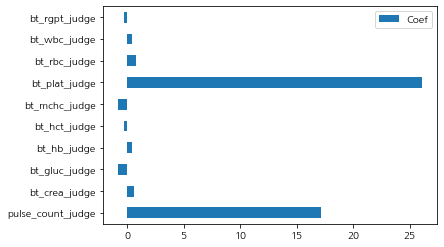

In [22]:
df_logistic_coef = pd.DataFrame({'Coef':log_result.params.values[1:]},index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')

# Score 탐색적 분석

In [23]:
bl_set.columns

Index(['age', 'height', 'weight', 'bust', 'waist', 'bmi', 'whtr', 'rfm', 'bp_min', 'bp_max', 'pulse_count', 'bt_chol', 'bt_gluc', 'bt_sgpt', 'judge_score', 'bp_judge', 'pulse_count_judge', 'bt_chol_judge', 'bt_crea_judge', 'bt_gluc_judge', 'bt_hb_judge', 'bt_hbsa_judge', 'bt_hct_judge', 'bt_mch_judge', 'bt_mchc_judge', 'bt_mvc_judge', 'bt_plat_judge', 'bt_rbc_judge', 'bt_wbc_judge', 'bt_rgpt_judge', 'bt_sgot_judge', 'bt_sgpt_judge', 'bt_trig_judge', 'risk'], dtype='object')

### T 검정

In [24]:
for col in bl_set :
    if col != 'risk' :
        print(col+"에 대한 T검정")
        my_t(bl_raw,col)
        print()

age에 대한 T검정
LeveneResult(statistic=5.158992574526426, pvalue=0.02318627646152752) [0.47105784]

height에 대한 T검정
LeveneResult(statistic=0.04459894966336369, pvalue=0.8327553944306695) [0.52756297]

weight에 대한 T검정
LeveneResult(statistic=1.7588555201437155, pvalue=0.1848531561214135) [0.51703053]

bust에 대한 T검정
LeveneResult(statistic=1.0762517982714899, pvalue=0.2996086470208456) [0.35202461]

waist에 대한 T검정
LeveneResult(statistic=0.5295781504615937, pvalue=0.4668325452662) [0.51626161]

bmi에 대한 T검정
LeveneResult(statistic=4.53839665618844, pvalue=0.03321159217953327) [0.66876974]

whtr에 대한 T검정
LeveneResult(statistic=0.21337606670959167, pvalue=0.644162522487943) [0.65584797]

rfm에 대한 T검정
LeveneResult(statistic=0.020007823430016974, pvalue=0.8875233099475585) [0.72162043]

bp_min에 대한 T검정
LeveneResult(statistic=0.005024777473280398, pvalue=0.9434927690959983) [0.20844495]

bp_max에 대한 T검정
LeveneResult(statistic=2.2554329025434607, pvalue=0.13323568490975843) [0.80386845]

pulse_count에 대한 T검정
Le

### Z 검정

In [25]:
mycrosstab(bl_raw,'bt_crea_judge')

bt_crea_judge   0.0  1.0
risk                    
0.0             324    2
1.0            3182   23

bt_crea_judge    0.0   1.0
risk                      
0.0            0.092  0.08
1.0            0.908  0.92


In [26]:
count = np.array([326,2])
num = np.array([3184+326,2+23])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.825


In [27]:
mycrosstab(bl_raw,'bt_hbsa_judge')

bt_hbsa_judge   0.0  1.0
risk                    
0.0             293   33
1.0            2815  390

bt_hbsa_judge    0.0    1.0
risk                       
0.0            0.094  0.078
1.0            0.906  0.922


In [28]:
count = np.array([294,34])
num = np.array([2816+294,34+391])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.333


In [29]:
mycrosstab(bl_raw,'bt_hct_judge')

bt_hct_judge   0.0  1.0
risk                   
0.0            314   12
1.0           3109   96

bt_hct_judge    0.0    1.0
risk                      
0.0           0.092  0.111
1.0           0.908  0.889


In [30]:
a = 316 ; b = 12 ; c = 3111 ; d = 96

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.505


In [31]:
mycrosstab(bl_raw,'bt_mch_judge')

bt_mch_judge   0.0  1.0
risk                   
0.0            317    9
1.0           3140   65

bt_mch_judge    0.0    1.0
risk                      
0.0           0.092  0.122
1.0           0.908  0.878


In [32]:
a = 319 ; b = 9 ; c = 3142 ; d = 65

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.388


In [33]:
mycrosstab(bl_raw,'bt_mchc_judge')

bt_mchc_judge   0.0  1.0
risk                    
0.0             294   32
1.0            3032  173

bt_mchc_judge    0.0    1.0
risk                       
0.0            0.088  0.156
1.0            0.912  0.844


In [34]:
a = 296 ; b = 32 ; c = 3034 ; d = 173

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3))) # 유의

p-value는 0.001


In [35]:
mycrosstab(bl_raw,'bt_mvc_judge')

bt_mvc_judge   0.0  1.0
risk                   
0.0            311   15
1.0           3111   94

bt_mvc_judge    0.0    1.0
risk                      
0.0           0.091  0.138
1.0           0.909  0.862


In [36]:
a = 313 ; b = 15 ; c = 3113 ; d = 94

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3))) # 보류

p-value는 0.101


In [37]:
mycrosstab(bl_raw,'bt_plat_judge')

bt_plat_judge   0.0  1.0
risk                    
0.0             326    0
1.0            3200    5

bt_plat_judge    0.0  1.0
risk                     
0.0            0.092  0.0
1.0            0.908  1.0


In [38]:
a = 328 ; b = 0 ; c = 3202 ; d = 5

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.474


In [39]:
mycrosstab(bl_raw,'bt_rbc_judge')

bt_rbc_judge   0.0  1.0
risk                   
0.0            325    1
1.0           3185   20

bt_rbc_judge    0.0    1.0
risk                      
0.0           0.093  0.048
1.0           0.907  0.952


In [40]:
a = 327 ; b = 1 ; c = 3187 ; d = 20

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.474


In [41]:
mycrosstab(bl_raw,'bt_wbc_judge')

bt_wbc_judge   0.0  1.0
risk                   
0.0            323    3
1.0           3164   41

bt_wbc_judge    0.0    1.0
risk                      
0.0           0.093  0.068
1.0           0.907  0.932


In [42]:
a = 325 ; b = 3 ; c = 3166 ; d = 41

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.571


In [43]:
mycrosstab(bl_raw,'bt_rgpt_judge')

bt_rgpt_judge   0.0  1.0
risk                    
0.0             302   24
1.0            3032  173

bt_rgpt_judge    0.0    1.0
risk                       
0.0            0.091  0.122
1.0            0.909  0.878


In [44]:
a = 304 ; b = 24 ; c = 3033 ; d = 174

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.156


In [45]:
mycrosstab(bl_raw,'bt_sgot_judge')

bt_sgot_judge   0.0  1.0
risk                    
0.0             319    7
1.0            3141   64

bt_sgot_judge    0.0    1.0
risk                       
0.0            0.092  0.099
1.0            0.908  0.901


In [46]:
a = 321 ; b = 7 ; c = 3143 ; d = 64

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.865


In [47]:
mycrosstab(bl_raw,'bt_trig_judge')

bt_trig_judge   0.0  1.0
risk                    
0.0             288   38
1.0            2880  325

bt_trig_judge    0.0    1.0
risk                       
0.0            0.091  0.105
1.0            0.909  0.895


In [48]:
a = 289 ; b = 39 ; c = 2882 ; d = 325

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.319


In [49]:
mycrosstab(bl_raw,'bt_gluc_judge')

bt_gluc_judge   0.0  1.0
risk                    
0.0             304   22
1.0            3109   96

bt_gluc_judge    0.0    1.0
risk                       
0.0            0.089  0.186
1.0            0.911  0.814


In [50]:
a = 305 ; b = 23 ; c = 3110 ; d = 97

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3))) # 유의

p-value는 0.000


# Case 정리

- 'pulse_count', 'bt_gluc_judge', 'bt_mchc_judge', 'bt_plat_judge','bt_rbc_judge','gender'
- 설명력 0.913, 분류 good 97, 정밀도 0.916 F1 0.955
- 'pulse_count', 'bt_gluc_judge', 'bt_mchc_judge', 'bt_plat_judge','bt_rbc_judge'
- 설명력 0.914  good 64 정밀도 0.918
- 'bp_judge', 'bp_min', 'bt_gluc', 'bt_mchc_judge'
- 설명력 0.913 good 74 정밀도 0.918
- 'bt_chol','bp_judge','bt_gluc_judge','bt_mchc_judge','gender'
- 설명력 0.916 good 76 정밀도 0.919
- 검정 : 'age', 'bmi', 'bt_gluc', 'bt_mchc_judge', 'bt_mvc_judge' 0.913, 54 => 컨퓨전 분류 X

=> 최종 변수 선택 : 'bt_chol','bp_judge','bt_gluc_judge','bt_mchc_judge','gender'

In [51]:
ensem_x = bl_raw[['bt_chol','bp_judge','bt_gluc_judge','bt_mchc_judge','gender']]
ensem_y = bl_raw[['risk']]

# ensem_x = pd.get_dummies(ensem_x)

# scaler = StandardScaler()
# en_sc = scaler.fit_transform(ensem_x)
# ensem_x = pd.DataFrame(en_sc,columns=ensem_x.columns)

# 데이터 분할 1 : 학습용과 시험용

train_x, test_x, train_y, test_y = train_test_split(ensem_x,ensem_y,test_size=0.3,random_state = 1234)
# 학습용 데이터를 밸리데이션과 학습용으로 분할함으로써 CV진행 준비
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 3/7, random_state = 1234)

In [52]:
gb_final = GradientBoostingClassifier(random_state=1234)
gb_final.fit(train_x,train_y)

print()
print('최종 모델의 train data의 설명력 : {:.3f}'.format(gb_final.score(train_x,train_y)))
print('최종 모델의 validation data의 설명력 : {:.3f}'.format(gb_final.score(val_x,val_y)))
print('최종 모델의 test data의 설명력 : {:.3f}'.format(gb_final.score(test_x,test_y)))


최종 모델의 train data의 설명력 : 0.917
최종 모델의 validation data의 설명력 : 0.912
최종 모델의 test data의 설명력 : 0.895


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# GB 모델 사용

- Scale 모델의 경우, 거절 고객의 분류 X
- DT, RF, GB 중 과적합이 적고, 초기 설명력이 높은 GB 사용
- 파라미터 설정 X => 파라미터 설정 유무에 설명력이 큰 영향 X

In [53]:
y_pred=gb_final.predict(test_x)
print('Accuracy:{0:.3f}\n'.format(gb_final.score(test_x,test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(test_y,y_pred)))

#분석 모델
model=['GradientBoosting']
#정확도 저장
train_accuracy=[]; test_accuracy=[]
#f1 score 저장
model_f1_score=[]
#auc score 저장
model_auc=[]
#precision score저장
model_precision_score=[]
#recall score 저장
model_recall_score=[]

#최종 모델
gb_model=GradientBoostingClassifier(random_state=1234)
gb_model.fit(train_x,train_y)
# train 정확도
train_accuracy.append(gb_model.score(train_x, train_y))
# test 정확도
test_accuracy.append(gb_model.score(test_x, test_y))
#최종 모델을 이용한 분류 예측
y_pred=gb_model.predict(test_x)
#roc_curve(실제값,예측값) fpr=(FP)/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성비율(재현율)
fpr,tpr,thresholds=roc_curve(test_y,y_pred)
roc_auc=auc(fpr,tpr)
#auc 저장
model_auc.append(roc_auc)

#f1스코어
model_f1_score.append(f1_score(test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(test_y,y_pred))

df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval['PrecisionScore']=model_precision_score
df_eval['RecallScore']=model_recall_score
df_eval.round(3)

Accuracy:0.895



/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion matrix:
[[  2 110]
 [  1 947]]


,TrainAccuracy,TestAccuracy,F1Score,AUC,PrecisionScore,RecallScore
GradientBoosting,0.917,0.895,0.945,0.508,0.896,0.999


정확도와 정밀도가 높은 변수 선택

In [54]:
df_eval=pd.DataFrame(index=model)
df_eval['Train_1']=0.908
df_eval['Test_1']=0.916
df_eval['Precision_1']=0.919
df_eval['Train_2']=0.867
df_eval['Test_2']=0.864
df_eval['Precision_2']=0.778

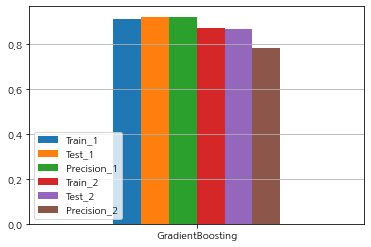

In [55]:
#정확도 bar plot 생성
df_eval.plot.bar(rot=0)
plt.legend(loc='lower left')
plt.grid(axis='y')
#인공신경망 모델이 가장 높은 정확도와 f1,auc를 보임
#neural_net>gradient boosting>decisiontree>randomforest

In [56]:
df_eval=pd.DataFrame(index=model)
df_eval['Train_1']=1 76
df_eval['Test_1']=0.865
df_eval['Precision_1']=0.871
df_eval['Train_2']=1
df_eval['Test_2']=0.825
df_eval['Precision_2']=0.625

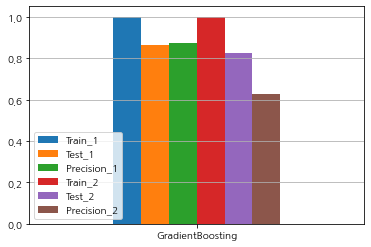

In [57]:
#정확도 bar plot 생성
df_eval.plot.bar(rot=0)
plt.legend(loc='lower left')
plt.grid(axis='y')
#인공신경망 모델이 가장 높은 정확도와 f1,auc를 보임
#neural_net>gradient boosting>decisiontree>randomforest

# 1분류 거절 고객 분류

In [58]:
df_raw = pd.read_csv('insu_pre_review.csv',encoding='euckr')
df_test = df_raw[df_raw['judge']=='거절']
df_test = df_test[df_test['review_cat'] == '혈액검사']
df_reject = df_test[['bt_chol','bp_judge','bt_gluc_judge','bt_mchc_judge','gender']]

# df_reject = pd.get_dummies(df_reject)
# en_sc_2 = scaler.fit_transform(df_reject)
# df_reject = pd.DataFrame(en_sc_2,columns=df_reject.columns)

In [59]:
pred = gb_final.predict(df_reject)
df_reject['risk'] = pred
df_reject['customer_id'] = df_test['customer_id']

<ipython-input-59-82cbb77c127c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reject['risk'] = pred
<ipython-input-59-82cbb77c127c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reject['customer_id'] = df_test['customer_id']


In [60]:
df_reject.groupby('risk').count()

,bt_chol,bp_judge,bt_gluc_judge,bt_mchc_judge,gender,customer_id
risk,,,,,,
0.0,29,29,29,29,29,29
1.0,2315,2315,2315,2315,2315,2315


### 총 수익 고객 76명, 위험 고객 2268명 -> 혈액 검사 기준
### 위험 고객은 2분류 이동, 저위험 고위험으로 분류

In [61]:
# 데이터 내보내기

df_profit = df_reject[df_reject['risk'] == 0][['customer_id','risk']]
df_danger = df_reject[df_reject['risk'] == 1][['customer_id','risk']]

df_profit.to_csv('profit_reject.csv',encoding='euckr')
df_danger.to_csv('danger_reject.csv',encoding='euckr')

### screen 데이터 predict

In [62]:
df = pd.read_csv('screen_1.csv',encoding='euckr')
df = df.drop('Unnamed: 0',axis=1)
df

,index,bp_max,bp_min,bp_gluc,bt_mch,bt_chol,gender,smoke_flag,drinking_flag,bp_judge,bt_gluc_judge,bt_mchc_judge
0,11565,119.0,73.0,89.0,15.3,197.0,1.0,1.0,0.0,0,0,0
1,23186,109.0,61.0,84.0,15.4,229.0,1.0,1.0,0.0,0,0,0
2,127414,134.0,80.0,90.0,17.2,196.0,1.0,1.0,0.0,1,0,0
3,35119,132.0,83.0,91.0,14.9,180.0,1.0,3.0,1.0,1,0,0
4,141647,121.0,90.0,98.0,14.8,212.0,1.0,2.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35416,161781,118.0,85.0,88.0,13.3,195.0,2.0,1.0,0.0,0,0,0
35417,174466,105.0,65.0,103.0,13.3,224.0,2.0,1.0,0.0,0,1,0
35418,122883,120.0,84.0,103.0,12.8,194.0,2.0,1.0,0.0,0,1,0
35419,107700,121.0,70.0,89.0,12.7,241.0,2.0,1.0,0.0,0,0,0


In [63]:
df_test = df[['bt_chol','bp_judge','bt_gluc_judge','bt_mchc_judge','gender']]
df_test

,bt_chol,bp_judge,bt_gluc_judge,bt_mchc_judge,gender
0,197.0,0,0,0,1.0
1,229.0,0,0,0,1.0
2,196.0,1,0,0,1.0
3,180.0,1,0,0,1.0
4,212.0,1,0,0,1.0
...,...,...,...,...,...
35416,195.0,0,0,0,2.0
35417,224.0,0,1,0,2.0
35418,194.0,0,1,0,2.0
35419,241.0,0,0,0,2.0


In [64]:
test_pred = gb_final.predict(df_test)
df_test['risk'] = test_pred
df_test.groupby('risk').count()

<ipython-input-64-bf22d0351361>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['risk'] = test_pred


,bt_chol,bp_judge,bt_gluc_judge,bt_mchc_judge,gender
risk,,,,,
0.0,720,720,720,720,720
1.0,34701,34701,34701,34701,34701


In [65]:
df_test['index'] = df['index']
df_test.to_csv('result_1.csv',encoding='euckr')

<ipython-input-65-eb5ca622d659>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['index'] = df['index']
